In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy import integrate
from matplotlib import ticker, cm

In [38]:
def crear_espacio(num_puntos_x, num_puntos_y, delta):
    """
    Crea un espacio de coordenadas en dos dimensiones.

    Esta función genera dos arreglos de coordenadas (x, y) y calcula las longitudes totales
    en cada dimensión. Utiliza una distancia uniforme 'delta' entre cada punto.

    Args:
    num_puntos_x (int): Número de puntos en la dirección x.
    num_puntos_y (int): Número de puntos en la dirección y.
    delta (float): Distancia entre puntos consecutivos en ambas direcciones.

    Returns:
    tuple: Contiene dos arreglos de numpy que representan las coordenadas x y y,
           seguidos de las longitudes totales en x y y.
    """
    longitud_x = num_puntos_x * delta
    longitud_y = num_puntos_y * delta
    coordenadas_x = np.linspace(0, longitud_x, num_puntos_x)
    coordenadas_y = np.linspace(0, longitud_y, num_puntos_y)
    return coordenadas_x, coordenadas_y, longitud_x, longitud_y

def inicializar_potencial(num_puntos_x, num_puntos_y, potencial_inicial_x, potencial_final_x, potencial_inicial_y, potencial_final_y):
    """
    Inicializa una matriz de potencial con valores de frontera específicos.

    Crea una matriz de ceros y establece los valores de frontera en los bordes de la matriz
    según los potenciales iniciales y finales dados para las direcciones x y y.

    Args:
    num_puntos_x (int): Número de puntos en la dirección x (columnas de la matriz).
    num_puntos_y (int): Número de puntos en la dirección y (filas de la matriz).
    potencial_inicial_x (float): Valor del potencial en el borde inicial en la dirección x.
    potencial_final_x (float): Valor del potencial en el borde final en la dirección x.
    potencial_inicial_y (float): Valor del potencial en el borde inicial en la dirección y.
    potencial_final_y (float): Valor del potencial en el borde final en la dirección y.

    Returns:
    ndarray: Matriz de numpy que representa el potencial inicializado.
    """
    potencial = np.zeros((num_puntos_x, num_puntos_y))
    potencial[0, :] = potencial_inicial_x
    potencial[-1, :] = potencial_final_x
    potencial[:, 0] = potencial_inicial_y
    potencial[:, -1] = potencial_final_y
    return potencial

def metodo_relajacion(matriz_potencial, num_puntos_x, num_puntos_y, tolerancia=1e-4):
    """
    Aplica el método de relajación para actualizar la matriz de potencial hasta alcanzar la convergencia.

    Realiza iteraciones actualizando los valores de la matriz de potencial en cada punto interior
    basándose en el promedio de sus puntos vecinos. El proceso se repite hasta que el cambio máximo
    en la matriz entre dos iteraciones consecutivas sea menor que la tolerancia especificada.

    Args:
    matriz_potencial (ndarray): Matriz inicial del potencial.
    num_puntos_x (int): Número de puntos en la dirección x.
    num_puntos_y (int): Número de puntos en la dirección y.
    tolerancia (float): Valor máximo permitido para el cambio máximo en la matriz potencial entre iteraciones.

    Returns:
    ndarray: Matriz de potencial actualizada después de alcanzar la convergencia.
    """
    for _ in range(int(1e4)):
        potencial_actualizado = matriz_potencial.copy()
        potencial_actualizado[1:-1, 1:-1] = 0.25 * (matriz_potencial[2:, 1:-1] + matriz_potencial[:-2, 1:-1] + matriz_potencial[1:-1, 2:] + matriz_potencial[1:-1, :-2])

        if np.abs(potencial_actualizado - matriz_potencial).max() < tolerancia:
            break

        matriz_potencial = potencial_actualizado

    return matriz_potencial

# Ejemplo de uso
potencial_inicial_x, potencial_final_x, potencial_inicial_y, potencial_final_y, num_puntos_x, num_puntos_y, delta = 0, 0, -1, 1, 10, 10, 0.1
coordenadas_x, coordenadas_y, longitud_x, longitud_y = crear_espacio(num_puntos_x, num_puntos_y, delta)
potencial = inicializar_potencial(num_puntos_x, num_puntos_y, potencial_inicial_x, potencial_final_x, potencial_inicial_y, potencial_final_y)
potencial = metodo_relajacion(potencial, num_puntos_x, num_puntos_y)

potencial

array([[-1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-1.        , -0.47243843, -0.24661484, -0.12356308, -0.03793788,
         0.03793788,  0.12356308,  0.24661484,  0.47243843,  1.        ],
       [-1.        , -0.64322039, -0.39059261, -0.20980601, -0.06617956,
         0.06617956,  0.20980601,  0.39059261,  0.64322039,  1.        ],
       [-1.        , -0.71001359, -0.46296394, -0.25911373, -0.08322558,
         0.08322558,  0.25911373,  0.46296394,  0.71001359,  1.        ],
       [-1.        , -0.73407987, -0.49247061, -0.28073751, -0.09095955,
         0.09095955,  0.28073751,  0.49247061,  0.73407987,  1.        ],
       [-1.        , -0.73407987, -0.49247061, -0.28073751, -0.09095955,
         0.09095955,  0.28073751,  0.49247061,  0.73407987,  1.        ],
       [-1.        , -0.71001359, -0.46296394, -0.25911373, -0.08322558,
         0.08322558,  0.25911373,  0.46296394

## Solución numerica

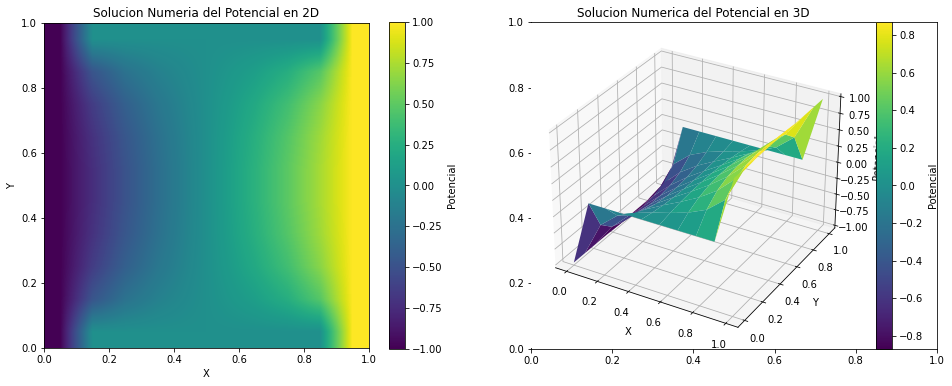

In [39]:
# Preparando los datos para ambas gráficas
X, Y = np.meshgrid(coordenadas_x, coordenadas_y)
Z = potencial

# Creación de una figura con dos subplots: uno para 2D y otro para 3D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 2D
cax = ax1.imshow(potencial, cmap='viridis', extent=[0, longitud_x, 0, longitud_y], interpolation='bilinear')
fig.colorbar(cax, ax=ax1, label='Potencial')
ax1.set_title('Solucion Numeria del Potencial en 2D')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Gráfica 3D
ax3d = fig.add_subplot(122, projection='3d')
surf = ax3d.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, ax=ax3d, label='Potencial')
ax3d.set_title('Solucion Numerica del Potencial en 3D')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Potencial')

plt.show()



## Solucion analitica

In [40]:
def calcular_potencial_analitico(coordenadas_x, coordenadas_y, voltaje_0, longitud_x, longitud_y):
    """
    Calcula el potencial eléctrico analítico en un espacio bidimensional.

    Esta función utiliza una serie de Fourier para calcular el potencial eléctrico en un rectángulo,
    con condiciones de frontera de voltaje en los lados paralelos a la coordenada y. 
    La serie converge a una solución analítica para el potencial en cada punto.

    Args:
    coordenadas_x (ndarray): Arreglo de coordenadas en el eje x.
    coordenadas_y (ndarray): Arreglo de coordenadas en el eje y.
    voltaje_0 (float): Valor del voltaje en los lados paralelos a la coordenada y.
    longitud_x (float): Longitud total en la dirección x.
    longitud_y (float): Longitud total en la dirección y.

    Returns:
    ndarray: Matriz del potencial eléctrico calculado analíticamente.
    """
    X, Y = np.meshgrid(coordenadas_x, coordenadas_y)
    potencial_analitico = np.zeros_like(X)

    coeficiente_global = 4 * voltaje_0 / np.pi
    for n in range(1, 100, 2):
        factor_n = n * np.pi
        termino_sinh_x = np.sinh(factor_n * X / longitud_x)
        termino_cosh_x = np.cosh(factor_n * X / longitud_x)
        termino_sin_y = np.sin(factor_n * Y / longitud_y)
        Bn = (1 + np.cosh(factor_n * longitud_y / longitud_x)) / np.sinh(factor_n * longitud_y / longitud_x)

        suma_parcial = (Bn * termino_sinh_x - termino_cosh_x) * termino_sin_y / n
        potencial_analitico += suma_parcial

    potencial_total = coeficiente_global * potencial_analitico
    return potencial_total

# Ejemplo de uso
potencial_analitico = calcular_potencial_analitico(coordenadas_x, coordenadas_y, 1, longitud_x, longitud_y)


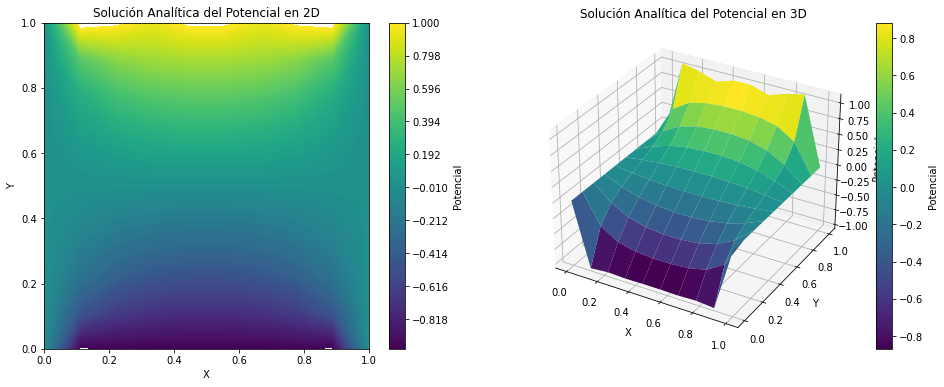

In [41]:
def mostrar_grafica_potencial_analitico_2D_3D(potencial, coordenadas_x, coordenadas_y):
    X, Y = np.meshgrid(coordenadas_x, coordenadas_y)
    niveles = np.linspace(-1, 1, 100)

    # Creación de una figura con dos subplots: uno para 2D y otro para 3D
    fig = plt.figure(figsize=(16, 6))

    # Gráfica 2D
    ax1 = fig.add_subplot(121)
    contorno2D = ax1.contourf(X, Y, potencial.T, levels=niveles, cmap='viridis')
    plt.colorbar(contorno2D, ax=ax1, label='Potencial')
    ax1.set_title('Solución Analítica del Potencial en 2D')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')

    # Gráfica 3D
    ax2 = fig.add_subplot(122, projection='3d')
    superficie3D = ax2.plot_surface(X, Y, potencial.T, cmap='viridis')
    fig.colorbar(superficie3D, ax=ax2, label='Potencial')
    ax2.set_title('Solución Analítica del Potencial en 3D')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Potencial')

    plt.show()

# Ejemplo de uso
mostrar_grafica_potencial_analitico_2D_3D(potencial_analitico, coordenadas_x, coordenadas_y)


## Comparacion entre las dos soluciones y error encontrado

In [44]:
def calcular_rmse(metodo_relajacion, calcular_potencial_analitico):
    """
    Calcula el error cuadrático medio (RMSE) entre dos matrices de potencial eléctrico.

    Esta función compara dos matrices, una obtenida mediante un método numérico (relajación)
    y otra a través de un cálculo analítico, y calcula el RMSE (Root Mean Square Error) para 
    cuantificar la diferencia entre ambas. Ambas matrices deben tener la misma forma.

    Args:
    metodo_relajacion (ndarray): Matriz del potencial obtenido por el método de relajación.
    calcular_potencial_analitico (ndarray): Matriz del potencial calculado analíticamente.

    Returns:
    float: Valor del RMSE entre las dos matrices de potencial.
    """
    
    assert metodo_relajacion.shape == calcular_potencial_analitico.shape, "Las matrices deben tener la misma forma."
    return np.sqrt(np.mean((metodo_relajacion - calcular_potencial_analitico)**2))
'
rmse = calcular_rmse(potencial, potencial_analitico)

print(f"El error cuadrático medio (RMSE) entre las soluciones numérica y analítica es: {rmse}")


El error cuadrático medio (RMSE) entre las soluciones numérica y analítica es: 0.20078451224330957
